# Install Zabbix Agent Passivo CentOS 7

O Zabbix Agent não precisa estar na mesma versão do servidor, neste caso foi instalado o Zabbix 5.0, então irei instalar o Zabbix Agent 5.0, mas não precisar ser na mesma versão. Para as demais versões do Linux a forma como é a instalação é basicamente a mesma o que muda são os binários (repositório) e o gerenciados de pacotes que ao invés de yum seria apt-get ou algo do tipo.

**Instalar o Repositorio**

In [ ]:
rpm -ivh https://repo.zabbix.com/zabbix/5.0/rhel/7/x86_64/zabbix-release-5.0-1.el7.noarch.rpm

**Instalar o service**

In [ ]:
yum install zabbix-agent

Precisa ser feito uma configuração no arquivo .conf do Zabbix, como se trata de uma forma Passiva vamos realizar da seguinte forma, sudo vi /etc/zabbix/zabbix_agentd.conf

Exclua no arquivo os seguintes parametros

ServerActive=
Hostname=

Os dois não são necessários neste tipo de monitoramento


Já no parametro **Server** coloque o ip do host

Server= (ip_do_host)

**Habilitando e dando start no service**

In [ ]:
sudo systemctl enable zabbix-agent 
sudo systemctl start zabbix-agent 

**Ver os logs do Zabbix Agent**


In [ ]:
tail -f /var/log/zabbix/zabbix_agentd.log

Após verificado, é necessário adicionar o nosso host no Zabbix Web para termos controle do que está sendo monitorado

**Primeiro Passo**


Abrir o Zabbix Web

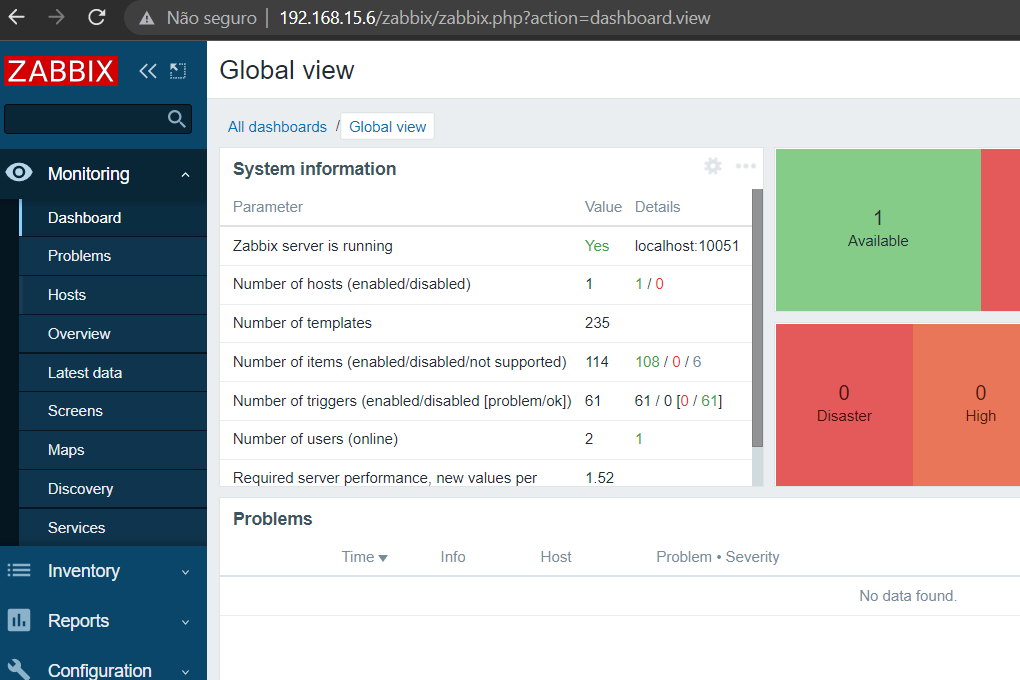


Configuration > Hosts > Create Host


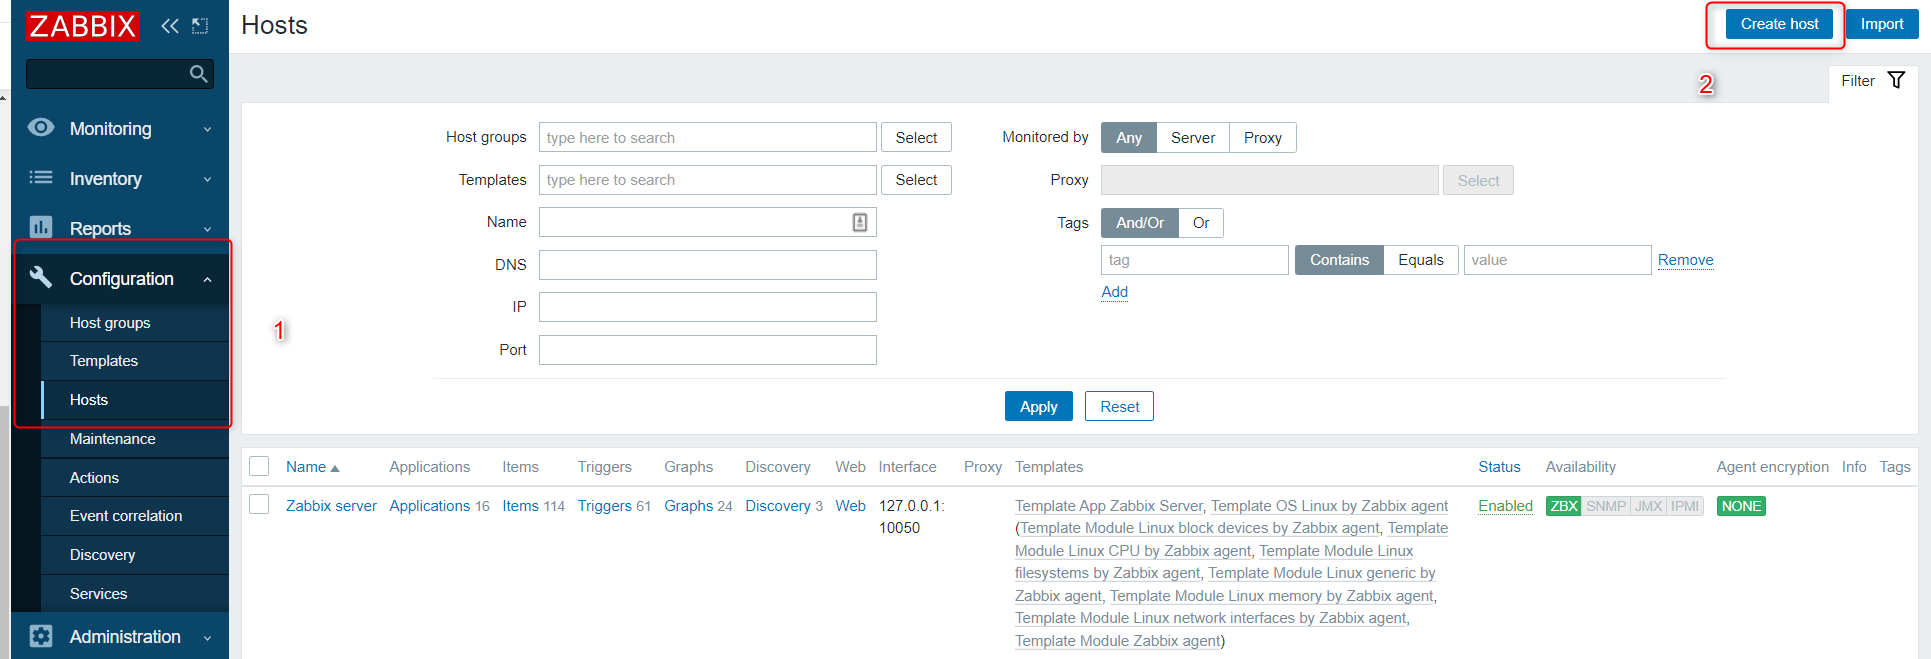


Coloque o nome do host, adicione o Grupo (voce pode criar ou usar algum grupo ja criado), coloque o ip do host na opção Ip address, verifique se o monitoramento será realizado através de Proxy, neste caso não, depois vá até templates e coloque o template que melhor supre suas necessidades.

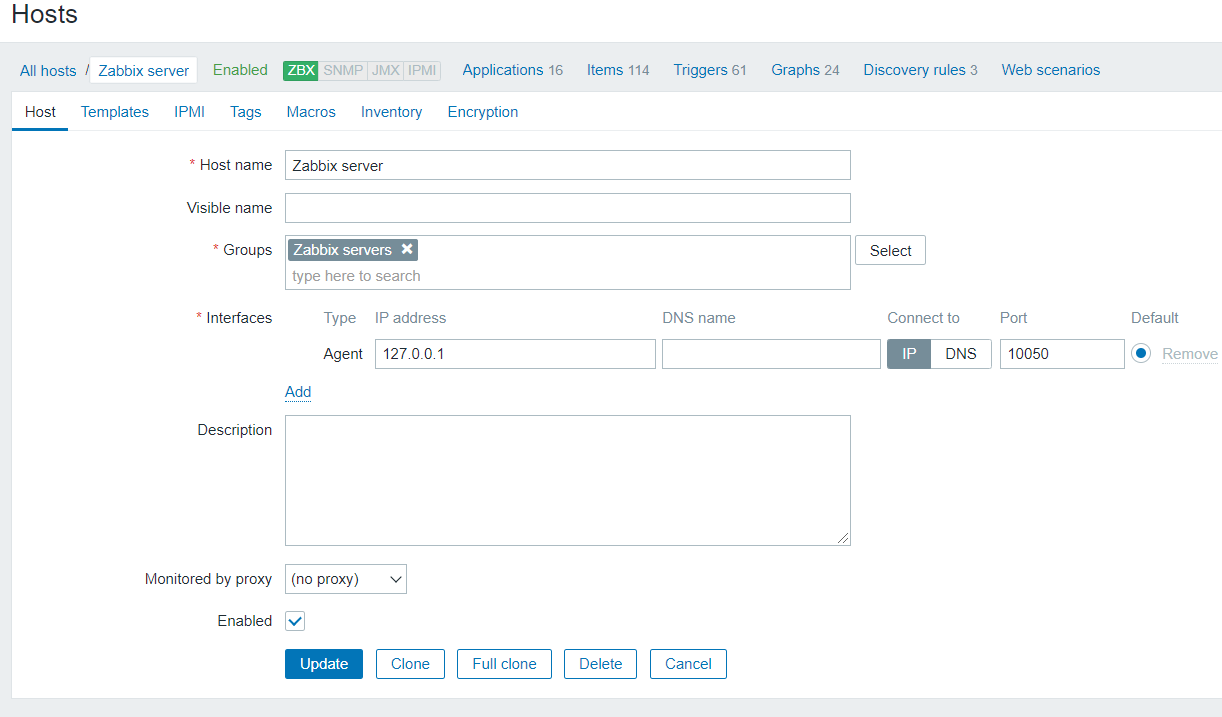





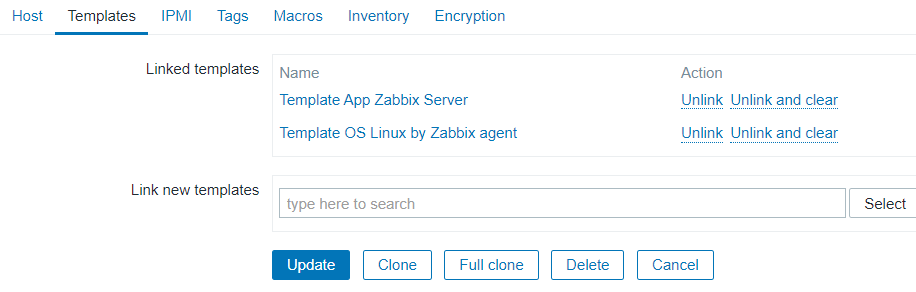


Outro ponto importante quando o Zabbix Agent é de forma passiva ele fica com a disponibilidade verde, existem três tipos de disponibilidade:

 
 *Verde:  monitoramento passivo está com disponivel
 
 *Vermelha: o monitoramento passivo está com indisponivel 
 
 *Nenhuma: normalmente utilizado em monitoramentos de forma Ativda, nao apresentar nenhuma cor nao quer dizer que esta com algum problema